<a href="https://colab.research.google.com/github/uptrain-ai/uptrain/blob/main/examples/checks/context_awareness/context_utlization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>


<h1 style="text-align: center;">Context Reranking</h1>


**What is Context Reranking?**: Context Reranking reflects the efficiency of the reranking process applied to the original context in generating the new renaked context used to answer a given question. This operator assess the degree to which the reranked context enhances the relevance, coherence, and informativeness with respect to the provided question.

**Data schema**: The data schema required for this evaluation is as follows:

| Column Name | Description                     |
| ----------- | ------------------------------- |
| question    | The question asked by the user  |
| context | Additional information provided that can be used to answer the question |
| reranked_context | The context generated from the original context using the reranking algorithm |


 If you face any difficulties, need some help with using UpTrain or want to brainstorm on custom evaluations for your use-case, [speak to the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

## Step 1: Install UpTrain by running 'pip install uptrain'

In [1]:
# !pip install uptrain

## Step 2: Let's define our dataset to run evaluations upon

In [2]:
data = [
    {
        "question": "What are the main causes of climate change?",
        "context": " 1. The main causes of climate change include greenhouse gas emissions from human activities such as burning fossil fuels, deforestation, and industrial processes. \n 2. Climate change is primarily driven by human-induced factors, including the release of carbon dioxide and other greenhouse gases into the atmosphere. \n 3. Human activities such as the burning of fossil fuels, agricultural practices, and land-use changes contribute significantly to climate change by increasing the concentration of greenhouse gases in the atmosphere. \n 4. Other factors that contribute to climate change include methane emissions from livestock and rice paddies, as well as nitrous oxide emissions from agricultural fertilizers. \n 5. Changes in land use, such as urbanization and deforestation, also play a role in altering local climates and contributing to global climate change.",
        "reranked_context": " 1. Climate change is primarily driven by human-induced factors, including the release of carbon dioxide and other greenhouse gases into the atmosphere. \n 2. Changes in land use, such as urbanization and deforestation, also play a role in altering local climates and contributing to global climate change. \n 3. The main causes of climate change include greenhouse gas emissions from human activities such as burning fossil fuels, deforestation, and industrial processes. \n 4. Human activities such as the burning of fossil fuels, agricultural practices, and land-use changes contribute significantly to climate change by increasing the concentration of greenhouse gases in the atmosphere. \n 5. Other factors that contribute to climate change include methane emissions from livestock and rice paddies, as well as nitrous oxide emissions from agricultural fertilizers. \n",
    },
    {
        "question": "How to make red sauce pasta?",
        "context": "Step 1: Heat oil in a pan over medium flame and add minced garlic along with chopped red chilli and red chilli flakes. Stir and saute for 2 minutes. Take another pan, pour the water and bring it to a boil. Then, add pasta to the boiling water along with some salt and 1/2 tbsp oil. Cook the pasta for a few minutes. When it is cooked through, drain the extra water and transfer the pasta to another bowl. \n Step 2: Now, heat the olive oil and add the peeled (or pureed) tomatoes, basil and parsley to the pan. Mix all the ingredients well and let it simmer for 10 minutes until the sauce starts to thicken. When the sauce starts gaining consistency, put off the burner and add salt and black pepper powder to the sauce. Keep the sauce warm. Add the pasta over the warm sauce and toss carefully so that each piece is coated with the sauce. \n Step 3: Cook for 2-3 minutes more and then serve the Red Sauce Pasta immediately. To make it more aromatic, you can dry roast a few basil leaves, crush them with some chilli flakes, oregano and add it to the dish. This herb fusion will make your pasta even more delectable. Serve it with garlic bread and relish this delicious pasta.",
        "reranked_context": "Step 1 : Cook for 2-3 minutes more and then serve the Red Sauce Pasta immediately. To make it more aromatic, you can dry roast a few basil leaves, crush them with some chilli flakes, oregano and add it to the dish. This herb fusion will make your pasta even more delectable. Serve it with garlic bread and relish this delicious pasta. \n Step 2: Heat oil in a pan over medium flame and add minced garlic along with chopped red chilli and red chilli flakes. Stir and saute for 2 minutes. Take another pan, pour the water and bring it to a boil. Then, add pasta to the boiling water along with some salt and 1/2 tbsp oil. Cook the pasta for a few minutes. When it is cooked through, drain the extra water and transfer the pasta to another bowl. \n Step 3: Now, heat the olive oil and add the peeled (or pureed) tomatoes, basil and parsley to the pan. Mix all the ingredients well and let it simmer for 10 minutes until the sauce starts to thicken. When the sauce starts gaining consistency, put off the burner and add salt and black pepper powder to the sauce. Keep the sauce warm. Add the pasta over the warm sauce and toss carefully so that each piece is coated with the sauce.",
    }
]

## Step 3: Running evaluations using UpTrain's Open-Source Software (OSS)

In [3]:
from uptrain import EvalLLM, Evals
import json

OPENAI_API_KEY = "sk-********************"  # Insert your OpenAI key here

eval_llm = EvalLLM(openai_api_key=OPENAI_API_KEY)

res = eval_llm.evaluate(
    data = data,
    checks = [Evals.CONTEXT_RERANKING]
)

print(json.dumps(res,indent=3))

/Users/shreyanshjain/anaconda3/lib/python3.11/site-packages/lazy_loader/__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)
2024-02-28 14:03:34.112 | INFO     | uptrain.framework.evalllm:evaluate_on_server:216 - Sending evaluation request for rows 0 to <50 to the Uptrain


[
   {
      "question": "What are the main causes of climate change?",
      "context": " 1. The main causes of climate change include greenhouse gas emissions from human activities such as burning fossil fuels, deforestation, and industrial processes. \n 2. Climate change is primarily driven by human-induced factors, including the release of carbon dioxide and other greenhouse gases into the atmosphere. \n 3. Human activities such as the burning of fossil fuels, agricultural practices, and land-use changes contribute significantly to climate change by increasing the concentration of greenhouse gases in the atmosphere. \n 4. Other factors that contribute to climate change include methane emissions from livestock and rice paddies, as well as nitrous oxide emissions from agricultural fertilizers. \n 5. Changes in land use, such as urbanization and deforestation, also play a role in altering local climates and contributing to global climate change.",
      "reranked_context": " 1. Climat

## Step 4: Let's look at some of the results 

### Sample with Good Reranking

In [4]:
print(json.dumps(res[0],indent=3))

{
   "question": "What are the main causes of climate change?",
   "context": " 1. The main causes of climate change include greenhouse gas emissions from human activities such as burning fossil fuels, deforestation, and industrial processes. \n 2. Climate change is primarily driven by human-induced factors, including the release of carbon dioxide and other greenhouse gases into the atmosphere. \n 3. Human activities such as the burning of fossil fuels, agricultural practices, and land-use changes contribute significantly to climate change by increasing the concentration of greenhouse gases in the atmosphere. \n 4. Other factors that contribute to climate change include methane emissions from livestock and rice paddies, as well as nitrous oxide emissions from agricultural fertilizers. \n 5. Changes in land use, such as urbanization and deforestation, also play a role in altering local climates and contributing to global climate change.",
   "reranked_context": " 1. Climate change is pr

### Sample without Bad Reranking

In [5]:
print(json.dumps(res[1],indent=3))

{
   "question": "How to make red sauce pasta?",
   "context": "Step 1: Heat oil in a pan over medium flame and add minced garlic along with chopped red chilli and red chilli flakes. Stir and saute for 2 minutes. Take another pan, pour the water and bring it to a boil. Then, add pasta to the boiling water along with some salt and 1/2 tbsp oil. Cook the pasta for a few minutes. When it is cooked through, drain the extra water and transfer the pasta to another bowl. \n Step 2: Now, heat the olive oil and add the peeled (or pureed) tomatoes, basil and parsley to the pan. Mix all the ingredients well and let it simmer for 10 minutes until the sauce starts to thicken. When the sauce starts gaining consistency, put off the burner and add salt and black pepper powder to the sauce. Keep the sauce warm. Add the pasta over the warm sauce and toss carefully so that each piece is coated with the sauce. \n Step 3: Cook for 2-3 minutes more and then serve the Red Sauce Pasta immediately. To make it 

## [Optional] Step 5: UpTrain Managed Service and Dashboards

You can create a free UpTrain account [here](https://uptrain.ai/) and get free trial credits. If you want more trial credits, [book a call with the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

UpTrain Managed service provides:
1. Dashboards with advanced drill-down and filtering options
2. Insights and common topics among failing cases
3. Observability and real-time monitoring of production data
4. Regression testing via seamless integration with your CI/CD pipelines

In [8]:
from uptrain import Evals, APIClient, Settings


UPTRAIN_API_KEY = "up-********************"  # Insert your UpTrain API key here

uptrain_client = APIClient(
    Settings(
        uptrain_access_token=UPTRAIN_API_KEY, response_format={"type": "json_object"}
    )
)

res = uptrain_client.log_and_evaluate(
    "Sample-context-re-ranking-evals", 
    data = data, 
    checks = [Evals.CONTEXT_RERANKING]
)

print(json.dumps(res, indent=3))

2024-02-28 13:56:03.778 | INFO     | uptrain.framework.remote:log_and_evaluate:669 - Sending evaluation request for rows 0 to <50 to the Uptrain server


[
   {
      "question": "What are the main causes of climate change?",
      "context": " 1. The main causes of climate change include greenhouse gas emissions from human activities such as burning fossil fuels, deforestation, and industrial processes. \n 2. Climate change is primarily driven by human-induced factors, including the release of carbon dioxide and other greenhouse gases into the atmosphere. \n 3. Human activities such as the burning of fossil fuels, agricultural practices, and land-use changes contribute significantly to climate change by increasing the concentration of greenhouse gases in the atmosphere. \n 4. Other factors that contribute to climate change include methane emissions from livestock and rice paddies, as well as nitrous oxide emissions from agricultural fertilizers. \n 5. Changes in land use, such as urbanization and deforestation, also play a role in altering local climates and contributing to global climate change.",
      "reranked_context": " 1. Climat

### Dashboards: 
Histogram of score vs number of cases with that score

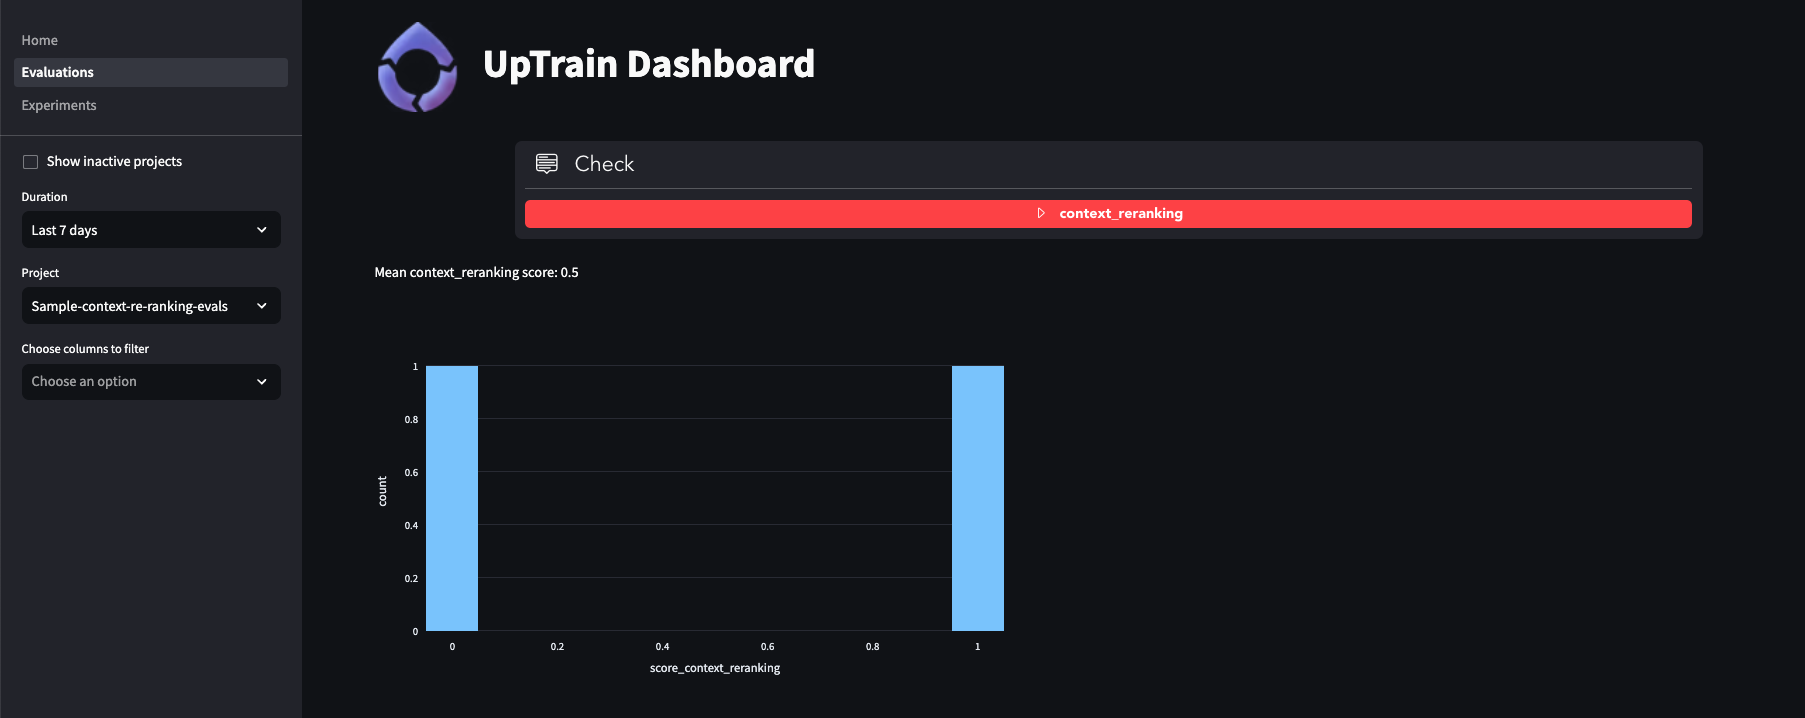

### Insights:
You can filter failure cases and generate common topics among them. This can help identify the core issue and help fix it

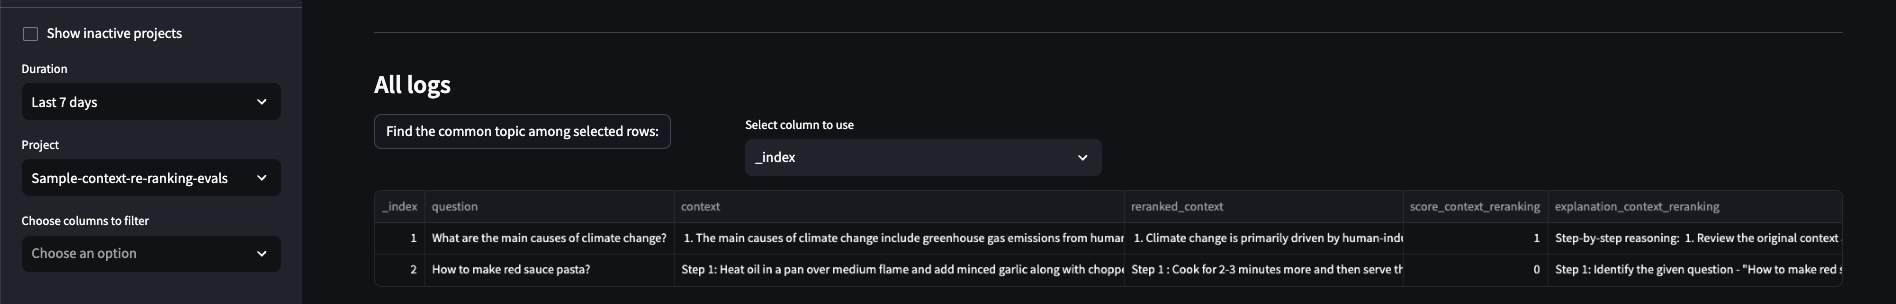